# Level 1 : task 1 

# Data Exploration and Preprocessing

Explore the dataset and identify the number
of rows and columns.

Check for missing values in each column and
handle them accordingly.

Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

In [4]:
#Importing packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#Ignore all warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"C:\Users\asmas\Downloads\Dataset  (3).csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Number of rows and columns in the dataset. 

In [6]:
print("Number of rows are:", data.shape[0])
print("Number of columns are:", data.shape[1])



Number of rows are: 9551
Number of columns are: 21


### Missing values

In [4]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Handling Missing Values

In [5]:
data.dropna(subset=['Cuisines'], inplace=True)

In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
data.dtypes


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

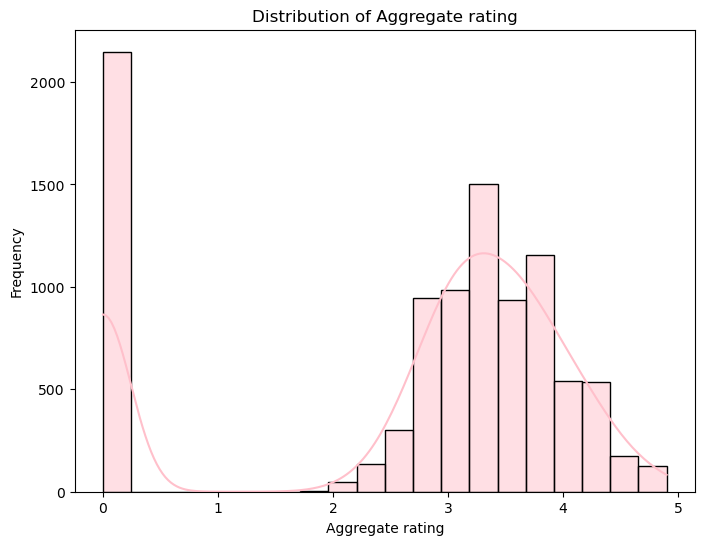

In [34]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True, color = 'pink')
plt.title("Distribution of Aggregate rating")
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Check for class imbalances
class_counts = data['Aggregate rating'].value_counts()
print("Class distribution:")
print(class_counts)

Class distribution:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


# Level 1 : task 2 


# Descriptive Analysis

Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.

Explore the distribution of categorical
variables like "Country Code," "City," and"Cuisines."

Identify the top cuisines and cities with the
highest number of restaurants.

In [10]:
numerical_columns = data.select_dtypes(include=['int64','float64'])
numerical_columns.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


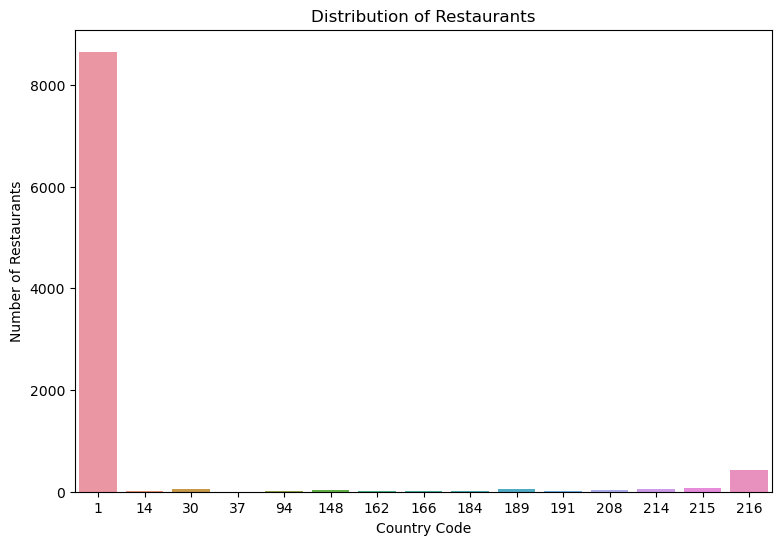

In [8]:
plt.figure(figsize=(9,6))
sns.countplot(x = data["Country Code"])
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants')
plt.show()

In [12]:
top_cuisines = data['Cuisines'].value_counts().head(10)
print("Top Cuisines:")
print(top_cuisines)


Top Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


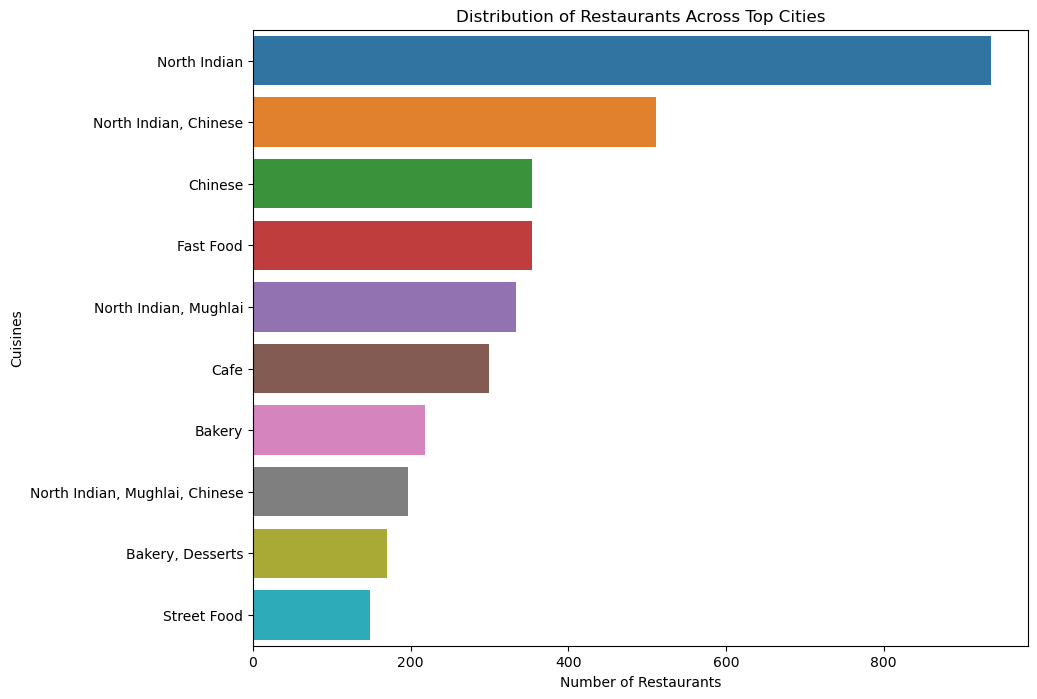

In [36]:
plt.figure(figsize=(10, 8))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values)
plt.title('Distribution of Restaurants Across Top Cities')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()


In [14]:
top_cities = data['City'].value_counts().head(10)
print("\nTop Cities with the Highest Number of Restaurants:")
print(top_cities)


Top Cities with the Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


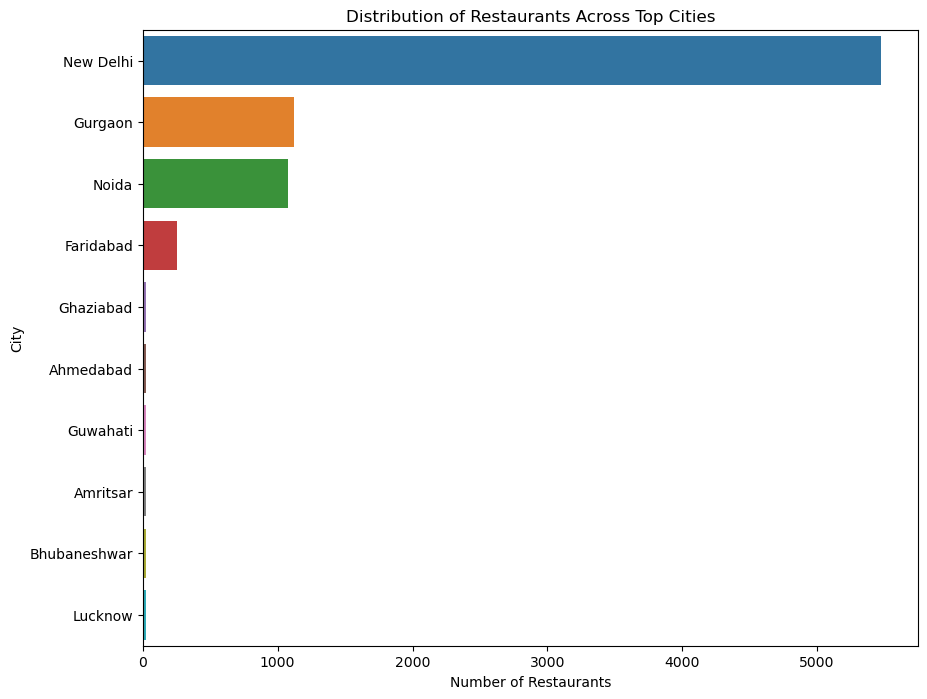

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(y=top_cities.index, x=top_cities.values, )
plt.title(f'Distribution of Restaurants Across Top Cities')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [16]:
top_Country_Code = data['Country Code'].value_counts().head(10)
print("\nCountry Code with the Highest Number of Restaurants:")
print(top_Country_Code)


Country Code with the Highest Number of Restaurants:
Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


# Level 1 : task 3 


# Geospatial Analysis


Visualize the locations of restaurants on a
map using latitude and longitude
information.

Analyze the distribution of restaurants
across different cities or countries.
Determine if there is any correlation
between the restaurant's location and its
rating.

In [10]:
!pip install geopandas shapely


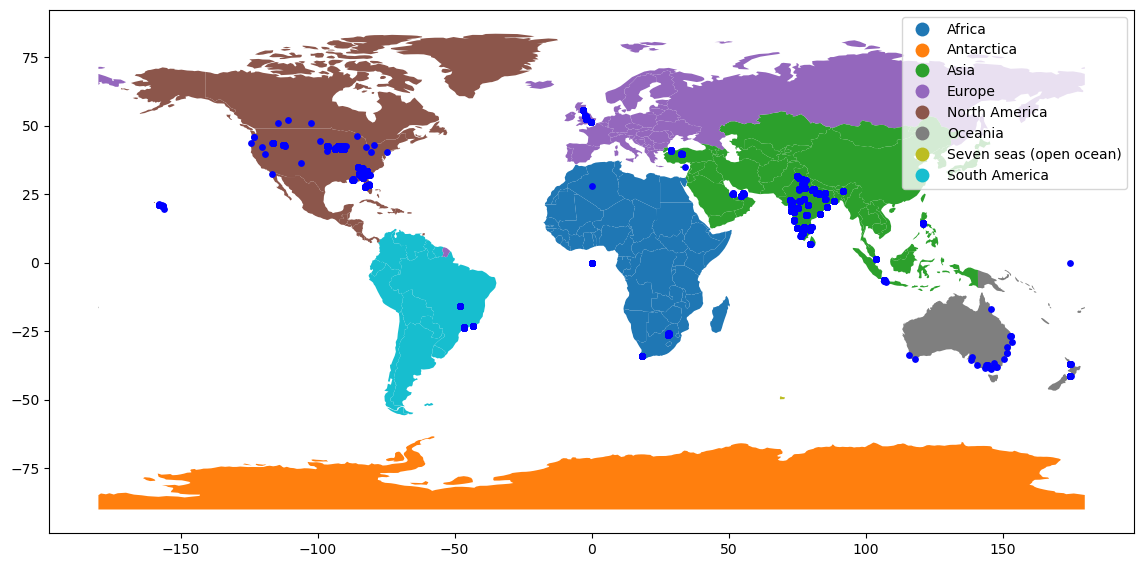

In [17]:
from shapely.geometry import Point
import geopandas as gpd 
from geopandas import GeoDataFrame
geometry = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

geometry.plot(ax=world.plot("continent",legend = True, figsize = (14,12)), marker = 'o', color = 'blue',markersize = 15 )
plt.show()

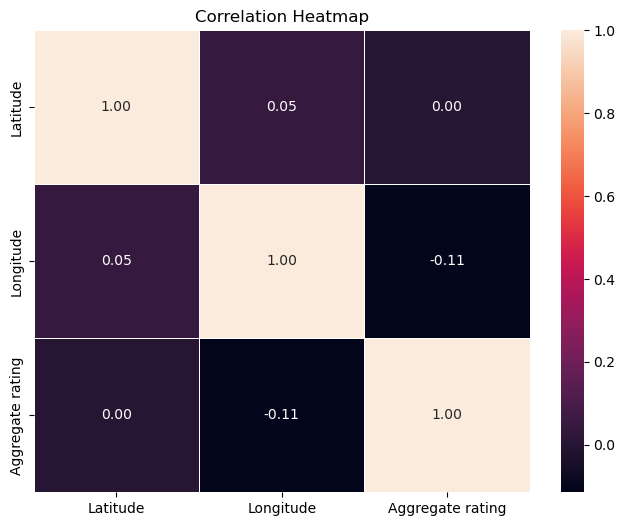

In [24]:
# Calculate the correlation matrix
correlation_matrix = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
